# Закономерности, определяющие успешность игры

## Задача

**Выявить определяющие успешность игры закономерности.**

## Исходные данные

In [1]:
import pandas as pd # импортируем библиотеку Пандас
import matplotlib.pyplot as plt
import seaborn as sns #Импортируем библиотеку для построения данных
from scipy import stats as st

In [3]:
data = pd.read_csv('games.csv') # Загружаем исходные данные

In [4]:
data.head(10) # Выводим первые 10 строк ДатаФрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Предобрабртка данных

#### **Приведем столбцы к нижнему регистру**

In [7]:
data.columns = data.columns.str.lower()# Переводим наименование столбцов в нижний регистр

In [8]:
data.head()#Проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Приводим данные к нижнему регистру

In [9]:
name_to_change = ['name','platform','genre'] # Имена колонок, где будем менять регистр

In [10]:
for elem in name_to_change: #Для каждого элемента в списке
    data[elem] = data[elem].str.lower()#Меняем регистр

In [11]:
data.head()#Проверка данных

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### **Изучим информацию о датафрейме `data`**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Результат**
* `year_of_release ` - имеет тип данных float64. Его надо преобразовать в int
* `user_score`- имеет тип данных object.
* Количество строк `16715`
* Количсевто колонок `11`
* Судя по количству заполненых данных в каждом столбце, есть пропуски в значениях

In [13]:
data['year_of_release'] = data['year_of_release'].fillna(-1)# Заменяем пропуски в годах на -1, тобы не портить значения данных

In [14]:
data['year_of_release'] = data['year_of_release'].astype('int64')# Преобразуем из float в int

#### Обработка пропусков

In [15]:
data.isna().sum() #Считаем количсевто пропусков в ДатаФрейме

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

**Результат**
* Пропуски в столбце `name`. Так как всего 2 пропуска, стоит удалить из данных
* Пропуски в столбце `year_of_release`. Возможно стоит оставить данные с пропусками
* Пропуски в столбце `critic_score`. Так оценка субъективно заменять пропуски нецелесообразно
* Пропуски в столбце `user_score`. Так оценка субъективно заменять пропуски нецелесообразно
* Пропуски в столбце `rating`.Так оценка субъективно заменять пропуски нецелесообразно

**Удаление пропусков в `name`**

In [16]:
data = data.dropna(subset = ['name'])# Удаляем строки с пропуском в name
data.isna().sum()# Проверяем оставшиеся пропуски

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Вместе с пропусками в `name` не соталось пропусков в `genre`

**Обратим внимание на данные о пользовательской оценке**

In [17]:
data['user_score'].unique() #посмотрим уникальные значения 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Согласно результатам, в данных етсь значение `tbd`. Оно означает `to be determined` - то есть **Рейтинг не определен**

Так как Оценка пользователей подразумевает некое число, переведем тип данных из `object` в `float`

In [18]:
data['user_score'] = data['user_score'].apply(pd.to_numeric, errors='coerce')# Меняем тип данных на float

In [19]:
data.info()# Проверка изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Данные рейтинга**

Пропуски в столбце `rating` могут оказать влияние на дальнейшее исследование. Заменим пропсуки в этом столце на значение `with_out_rating`

In [20]:
data['rating'] = data['rating'].fillna('with_out_rating')

### Результат

* Лишние значение удалены
* Типы данных в нужных ячейках изменены
* Пропуски оставлены нетронутыми. В последующем, при анализе, будем отфильтровывать значения.

### Первичный подсчет данных

Найдем суммарные продажи по всем регионам

In [21]:
data['sum_sale'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] #Проволим суммирование
data.head() #Проверяем результат

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,with_out_rating,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,with_out_rating,31.38


### Исследовательская часть анализа

#### Cколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [22]:
data_for_years = data.pivot_table(index='year_of_release',values='name', aggfunc='count')

<AxesSubplot:title={'center':'Количество игр в год'}, xlabel='Год', ylabel='Количесвто'>

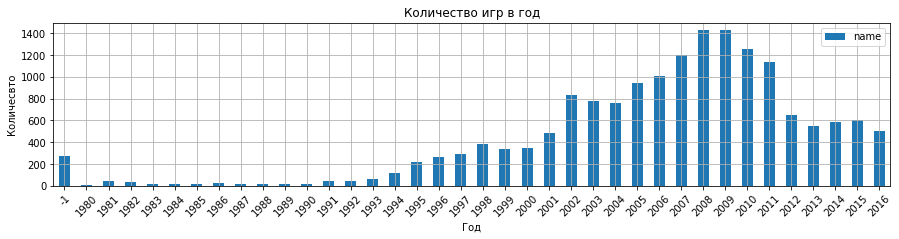

In [23]:
data_for_years.plot(title='Количество игр в год',grid=True, kind='bar',xlabel='Год', ylabel='Количесвто',figsize=(15,3),rot=45)

**Результат**
* Согласно данным графика наибольшее количесвто игр выпускалось в период с 2002 по 2012 годы
* Стоит в последующем анализе рассматривать срез по дате игры от 2002 года до текущего, так какв этот период выросло количесвто выпущенных игр

**Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [24]:
data_top_five = (
    data.pivot_table(index=['platform'], values='sum_sale',aggfunc='sum')
        .sort_values(by='sum_sale',ascending=False)
        .reset_index()
        .head(5)
) #Создаем Сводную таблицу по платформам и считаем сумму продаж. Затем выводим верхние 5 значений

In [25]:
top_five_platform = data_top_five['platform'] # Создаем список из топ 5 платформ

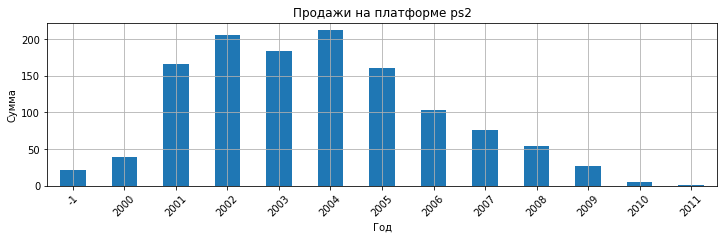

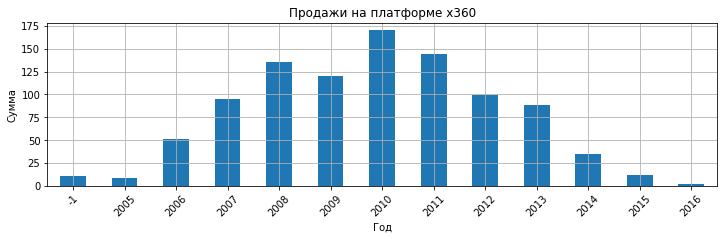

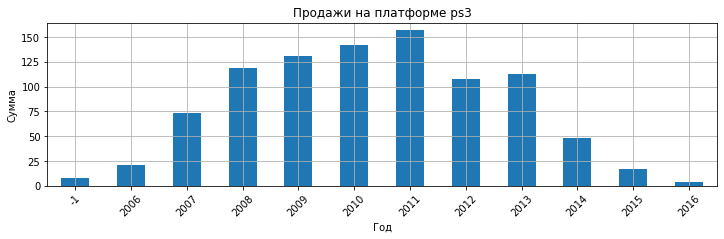

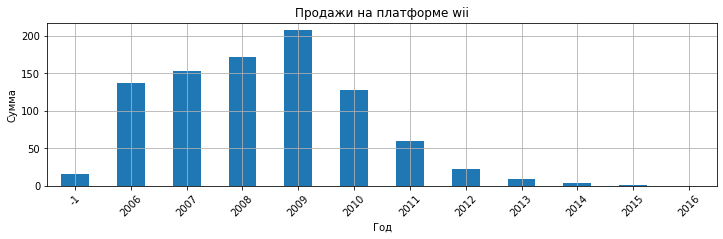

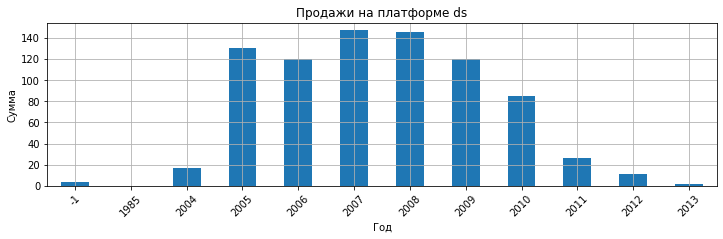

In [26]:
for elem in top_five_platform:
    data.query('platform == @elem').groupby(by='year_of_release')['sum_sale'].sum().plot(title=f'Продажи на платформe {elem}',grid=True, kind='bar',xlabel='Год', ylabel='Сумма',figsize=(12,3),rot=45)
    plt.show()

**Результат:**

* **Платформа ps2** - Резкий скачок продаж в 2001. После 2005 года начался спад по проажам на платформе
* **Платформа x369** - Активные продажи в период с 2007 по 2013
* **Платформа wii** - В 2006 резкий старт продаж. Так продолжилось до 2010 года
* **Платформа ps3** - Активные продажи с 2007 по 2014 год
* **Платформа ds** - Резкий скачок продаж в 2005. Продлилось это до 2010 года

**Средний срок максимальной прибыли в топ 5 платформ составляет 5 лет.**

#### Выбор актульной даты для последубщего анализа

Согласно предыдущему пункту - срок максмиальных продаж составляет 5 лет. Так как стоит задача сделать предположение на 2017 год, данные для анализа должны включать, как минимум, 2016 год. Также, согласно результат предыдущего пункта - пиковые занчения в основном приходятся на 3-4 года. Соответственно возьмем для последующего анализа результаты за период 2014 - 2016

In [27]:
data_date = data.query('year_of_release >= 2014 and year_of_release <=2016').reset_index(drop=True) #Создаем новый Датафрейм для последующего анализа

In [28]:
data_date.head() # Проверим что у нас получилось

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sale
0,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,with_out_rating,14.63
1,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,with_out_rating,11.68
3,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,with_out_rating,7.98


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [29]:
data_top_five_new = (
    data_date.pivot_table(index=['platform'], values='sum_sale',aggfunc='sum')
        .sort_values(by='sum_sale',ascending=False)
        .reset_index()
        .head(5)
) #Создаем Сводную таблицу по платформам и считаем сумму продаж. Затем выводим верхние 5 значений

In [30]:
top_five_platform_new = data_top_five_new['platform'] # Создаем список из топ 5 платформ

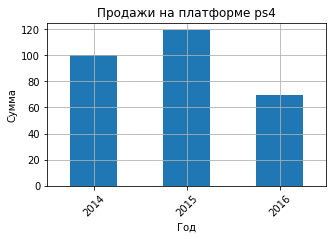

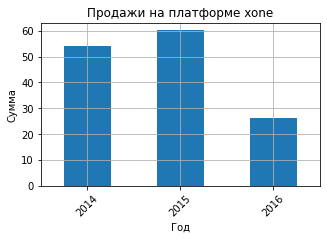

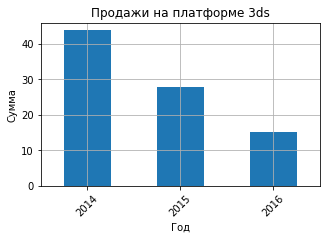

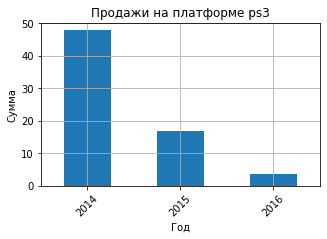

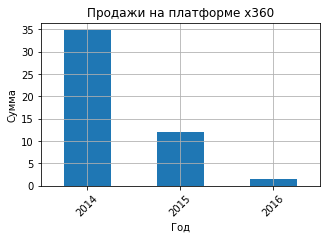

In [31]:
for elem in top_five_platform_new:
    data_date.query('platform == @elem').groupby(by='year_of_release')['sum_sale'].sum().plot(title=f'Продажи на платформe {elem}',grid=True, kind='bar',xlabel='Год', ylabel='Сумма',figsize=(5,3),rot=45)
    plt.show()

In [32]:
top_five_platform_new

0     ps4
1    xone
2     3ds
3     ps3
4    x360
Name: platform, dtype: object

**Результат:**
* Топ 5 по проадаж за исследуемый период - *`ps4`*,*`xone`*,*`3ds`*,*`ps3`*,*`x360`*
* Согласно результатам на графиках - последние три платформы имеют явную тенденцию к снижению прибыли. Скорее всего, первые 2 платформы скорее всего будут иметь потенциал к росту в 2017 году

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат**

Text(0.5, 1.0, 'Распределение суммарных продаж по топ 5 платформ')

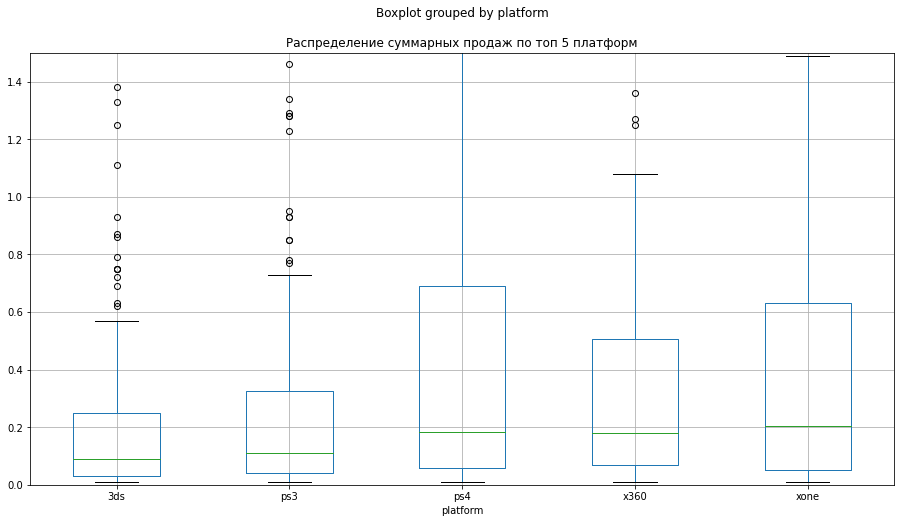

In [33]:
data_date.query('platform in ["ps4", "xone", "3ds", "ps3","x360"]').boxplot('sum_sale', by = 'platform', figsize = (15,8))
plt.ylim(0, 1.5)
plt.title('Распределение суммарных продаж по топ 5 платформ')

**Результат**

* Максимальное медианное значение суммарных продаж у платформы **xone**
* У платформ **ps4**, **x360**, **xone** максимальный разброс значений

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

Будем рассматривать платформу **xone**

<AxesSubplot:xlabel='user_score', ylabel='sum_sale'>

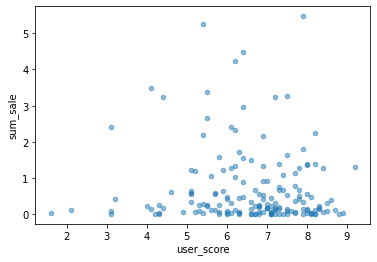

In [34]:
data_date.query('platform == "xone" and user_score != "tbd"').plot(x='user_score', y='sum_sale', kind='scatter', alpha=0.5) 

<AxesSubplot:xlabel='critic_score', ylabel='sum_sale'>

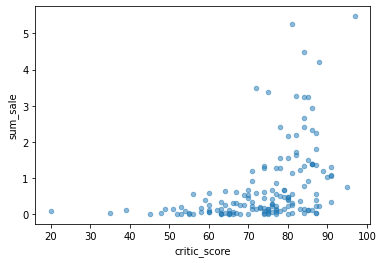

In [35]:
data_date.query('platform == "xone" and user_score != "tbd"').plot(x='critic_score', y='sum_sale', kind='scatter', alpha=0.5) 

In [36]:
print('Корреляция между оценкой критиков и мировыми продажами:',
        data_date.query('platform == "xone" and user_score != "tbd"')['critic_score'].corr(data_date.query('platform == "xone" and user_score != "tbd"')['sum_sale'])
     )

Корреляция между оценкой критиков и мировыми продажами: 0.42867694370333226


In [37]:
data_date['user_score'] = data_date['user_score'].fillna(-1) # Заменяем пропуски в data_date на -1, для возможности подсчета коэффициента Корреляция Пирсона

In [38]:
print('Корреляция между оценкой пользователей и мировыми продажами:',
        data_date.query('platform == "xone" and user_score != "tbd"')['user_score'].astype('float').corr(data_date.query('platform == "xone" and user_score != "tbd"')['sum_sale'])
     )#Выводим на экран Коэффициент корреляции  применяя фильтрацию и смену тпа данных у user_score с str на float

Корреляция между оценкой пользователей и мировыми продажами: 0.10671381981034207


**Результат:**
* Согласно диаграме рассеивания, основное влияние на количесвто продаж имеют оценки Критикев, чем оценки пользователей
* Эти результаты подтверждают коэфффициенты корреляции Пирсона.

**Соотнесите выводы с продажами игр на других платформах**

Для анализа возьмем данные из списка топ 5 платформ по продажам.

In [39]:
data_date['user_score']= data_date.query('user_score != "tbd"')['user_score'].astype('float')

In [40]:
def score_platform(need_data,score_1,score_2,platform):
    #fig, axes = plt.subplots(nrows=1, ncols=2)
    need_data.plot(x=score_1 ,y='sum_sale',kind='scatter',alpha=0.5, figsize=(5,3))
    plt.title(f'Платформа {platform} по {score_1}')
    plt.show()
    need_data.plot(x=score_2 ,y='sum_sale',kind='scatter',alpha=0.5, figsize=(5,3))
    plt.title(f'Платформа {platform} по {score_2}')
    plt.show()
    return print('Корреляция между оценкой пользователей и мировыми продажами:',
                    need_data[score_1].corr(need_data['sum_sale']),"\n",
                 'Корреляция между оценкой критиков и мировыми продажами:',
                    need_data[score_2].corr(need_data['sum_sale'])
                 )

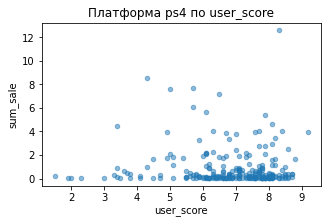

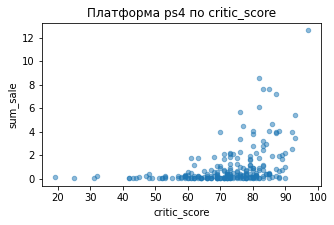

Корреляция между оценкой пользователей и мировыми продажами: -0.040131589472697356 
 Корреляция между оценкой критиков и мировыми продажами: 0.40190287811475334


In [41]:
score_platform(data_date.query('platform == "ps4" and user_score != "tbd" and user_score > 0'),'user_score','critic_score','ps4')

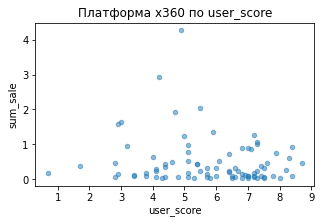

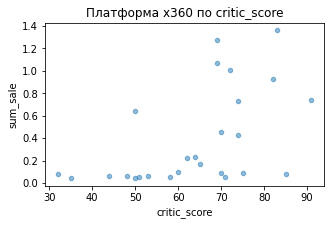

Корреляция между оценкой пользователей и мировыми продажами: -0.138444570945665 
 Корреляция между оценкой критиков и мировыми продажами: 0.5257228356581523


In [42]:
score_platform(data_date.query('platform == "x360" and user_score != "tbd" and user_score > 0'),'user_score','critic_score','x360')

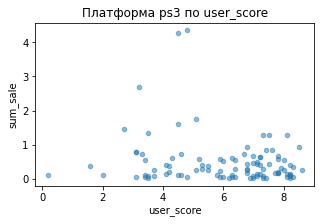

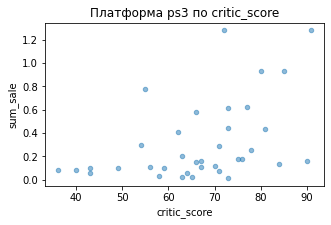

Корреляция между оценкой пользователей и мировыми продажами: -0.16676141347662118 
 Корреляция между оценкой критиков и мировыми продажами: 0.44657460493190704


In [43]:
score_platform(data_date.query('platform == "ps3" and user_score != "tbd" and user_score > 0'),'user_score','critic_score','ps3')

**Результат**:
* По данным о платформах `ps3`, `x360`,`ps4` Результаты совпадают с результаты исследования самой плпулярной платформы `xone`
* **Наибольшее влияние на продажи влияют оценки критиков по сравнению с оценками пользователей**

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [44]:
#data_date_genre = data_date.pivot_table(index='genre', values='sum_sale',aggfunc='sum')

In [45]:
#data_date_genre.plot(title=f'Распределие прибыли по жанру',grid=True, kind='bar',xlabel='Жанр', ylabel='Сумма',figsize=(9,3),rot=45 )

Text(0.5, 1.0, 'Распределение суммарных продаж по жанрам игр')

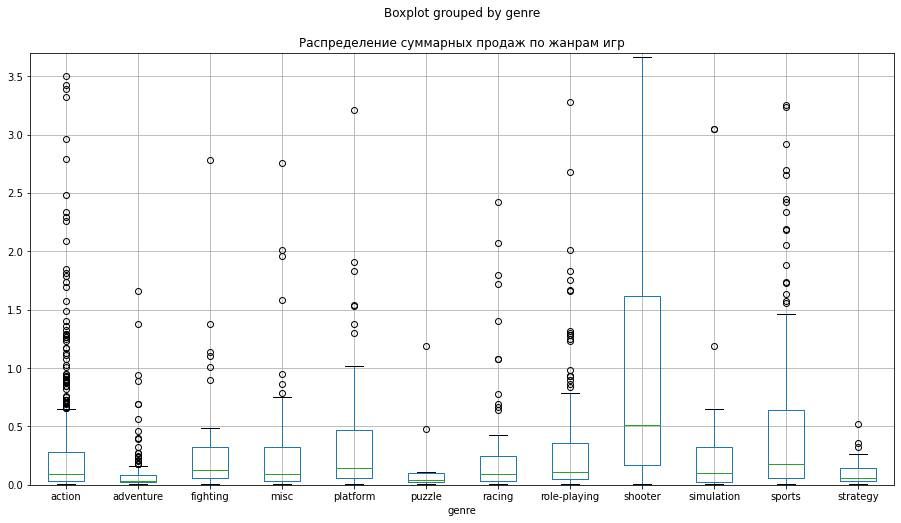

In [46]:
data_date.boxplot('sum_sale', by = 'genre', figsize = (15,8))
plt.ylim(0, 3.7)
plt.title('Распределение суммарных продаж по жанрам игр')

**Результат новый**

Наибольшее медианное значение продаж и потенциал для роста имеют
* `shooter`
* `sports`
* `platform`
* `role-playing`

**Результат - старый **
Наибольшей доходность  характеризуются следующие жанры:
* `action`
* `role-playing`
* `shooter`
* `sports`

### Портрет пользователя каждого региона

**Самые популярные платформы (топ-5) по регионам**

In [47]:
data_date_top = data_date.pivot_table(index=['platform'], values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')#Собираем сводную таблицу по нужным данным
data_date_top = data_date_top.rename(columns={"na_sales": "na", "eu_sales": "eu", "jp_sales" : "jp", "other_sales":"other"})#Меняем названия столбцов

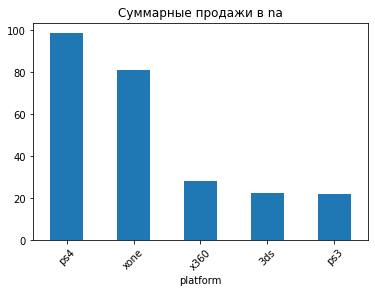

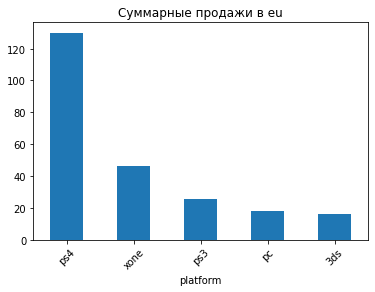

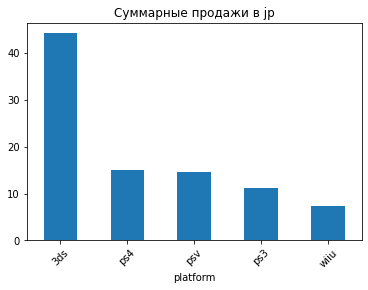

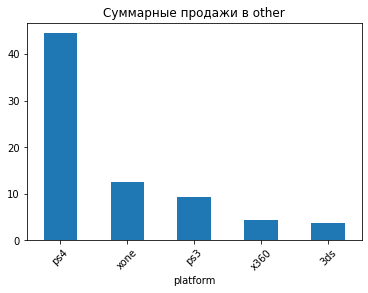

In [48]:
for elem in ['na','eu','jp','other']: #Выводим графики на экран по распределению продаж в каждом регионе
    data_date_top[elem].sort_values(ascending=False).head(5).plot(kind='bar',rot=45)
    plt.title(f'Суммарные продажи в {elem}')
    plt.show()

**Результаты**
* В Северной Америке наибольшая популярность у платформы `ps4`
* В Европе наибольшая популярность у платформы `ps4`
* В Японии наибольшая популярность у платформы `3ds`
* В других регионах самая популярная платформа `ps4`

**Самые популярные жанры (топ-5). Поясните разницу.**

In [49]:
data_date_genre_reg = data_date.pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')
data_date_genre_reg = data_date_genre_reg.rename(columns={"na_sales": "na", "eu_sales": "eu", "jp_sales" : "jp", "other_sales":"other"})#Меняем названия столбцов

In [50]:
data_date_genre_reg.head()

,eu,jp,na,other
genre,,,,
action,74.68,29.58,72.53,22.57
adventure,6.49,3.60,5.64,1.82
fighting,6.69,6.37,12.43,2.73
misc,12.86,5.61,15.05,4.03
platform,6.80,2.69,6.79,1.81


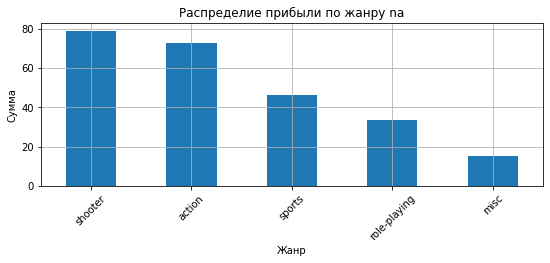

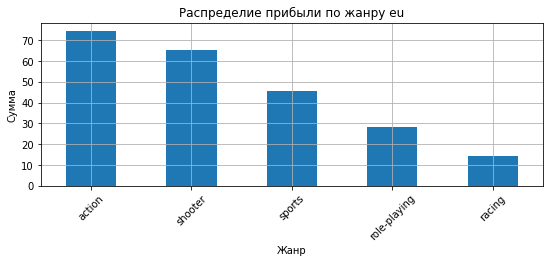

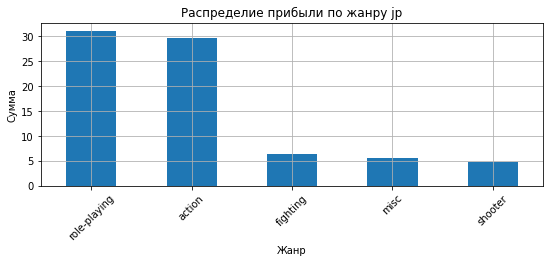

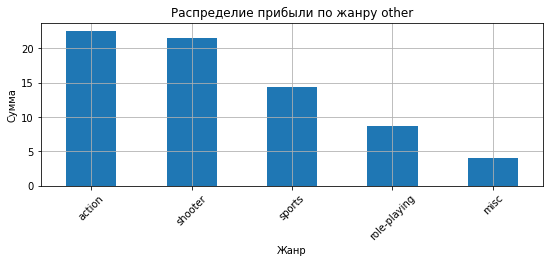

In [51]:
for elem in ['na','eu','jp','other']:
    data_date_genre_reg[elem].sort_values(ascending=False).head(5).plot(title=f'Распределие прибыли по жанру {elem}',grid=True, kind='bar',xlabel='Жанр', ylabel='Сумма',figsize=(9,3),rot=45 )
    plt.show()

**Результаты**
* В Северной Америке и Европе самые популярные жанры игр 
    * `shooter`
    * `action`
    * `sports`
* В Японии самые популярные игры:
    * `role-playing`
    * `action`
* В остальном мире самые популярные жанры игр совпадают с Северной Америкой и Европой:
    * `shooter`
    * `action`
    * `sports`

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [57]:
data_rat = data_date.pivot_table(index='rating', values = ['na_sales','eu_sales','jp_sales','other_sales'],aggfunc='sum')
data_rat = data_rat.rename(columns={"na_sales": "na", "eu_sales": "eu", "jp_sales" : "jp", "other_sales":"other"})#Меняем названия столбцов

In [58]:
data_rat = data_rat.reset_index()

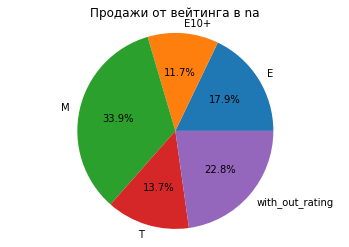

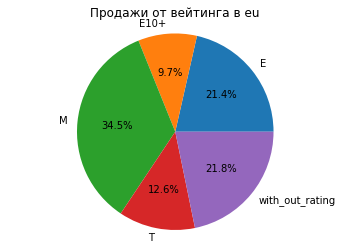

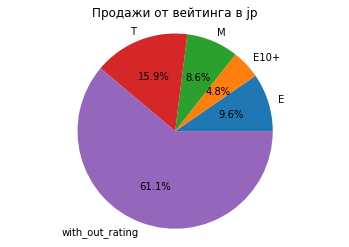

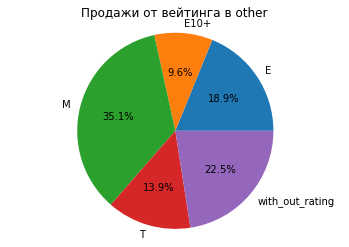

In [59]:
for elem in ['na','eu','jp','other']:
    fig, ax = plt.subplots()
    ax.pie(data_rat[elem], labels= data_rat.rating, autopct='%1.1f%%')
    ax.axis("equal")
    plt.title(f'Продажи от вейтинга в {elem}')
    plt.show()

**Результат**:
* Игры без рейтинга занимают пости четверть объемов продаж по регионам. А в Японии их доля более 60%
* В Северной Америке, Европе и Других странах самые продаваемые игры с рейтингом `M`
* В Японии, как сказано выше, большую часть занимают продажи игр без рейтинга. Второе место по продажам занимают игры с Рейтингом `T`

### Проверка Гипотез

#### Гипотеза номер 1

*Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Сформулируем нулевые гипотезы:

Нулевая Гипотеза Н0 = *Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Альтернативная гипотеза H1: *Средние пользовательские рейтинги платформ Xbox One и PC различаются*

In [55]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(data_date[(data_date['platform']=='xone')]['user_score'].dropna(), data_date[(data_date['platform']=='pc')]['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.26246011727057733
Не получилось отвергнуть нулевую гипотезу


**Вывод**: p-value около 35 %. Значит отвергнуть Нулевую гипотезу нельзя. То есть Средние пользовательские рейтинги `Xbox one` и `pc` схожи

#### Гипотеза 2

*Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные*

Нулевая гипотеза H₀: *Средние пользовательские рейтинги жанров Action и Sports одинаковые.*

Альтернативная гипотеза H₁: *Средние пользовательские рейтинги жанров Action и Sports различаются.*

In [56]:
#Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = .05

results = st.ttest_ind(data_date[(data_date['genre']=='action')]['user_score'].dropna(), data_date[(data_date['genre']=='sports')]['user_score'].dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.829371809684136e-05
Отвергаем нулевую гипотезу


**Вывод**: Значение p-value сильно меньше 1%. Значит актуальна альтернативная гипотеза: *Средние пользовательские рейтинги жанров Action и Sports различаются*

## Вывод

Проведена предобработка данных:
* Значение столбцов и строк приведены к нижнему регистру
* Проведена частичная замена пропусков исходя из известных данных по ДатаФрейму

Проведен Исследовательский анализ данных. Выводы по результату анализа

**Важны ли данные за весь известный период?**

Согласно результатам исследвоания, для составления картины на 2017 год достаточно проанализировать данные за 4 последние года так как:
* Большой рост популярности игр виден в период с 2002 года
* При этом "жизнь" платформы около 5 лет
* Для прогноза на 2017 год необходимо учитывать те платформы, которые имею к концу 2016 восходящий Тред по продажам

**Потенциально прибыльные платформы**

* Топ 5 по продаж за исследуемый период - *`ps4`*,*`xone`*,*`3ds`*,*`ps3`*,*`x360`*
* По распределению суммарных продаж - потенциальные лидеры это *`ps4`* и *`xone`*

**Влияние на продажи отзывы критиков и игроков**

Согласно результатам, наибольшие влияние на продажи оказывают оценки критиков, по сравнению с оценками игроков (Корреляция по игрокам сотавляет окло 0.1, в то время как по критикам более 0.4 для разных платформ). Значит для построения бизнес модели для послежующего периода следует опиарться на мнение **Критиков**

**Популярные жанры по общему числу продаж**

Наибольшей доходность характеризуются следующие жанры:
* `shooter`
* `sports`
* `platform`
* `role-playing`

**Портрет пользователя по регионам**

Топ популярных плотформ по регионам:
* В Северной Америке наибольшая популярность у платформы `ps4`
* В Европе наибольшая популярность у платформы `ps4`
* В Японии наибольшая популярность у платформы `3ds`
* В других регионах самая популярная платформа `ps4`

Топ популярных жанров в регионах:

* В Северной Америке и Европе самые популярные жанры игр 
    * `shooter`
    * `action`
    * `sports`
* В Японии самые популярные игры:
    * `role-playing`
    * `action`
* В остальном мире самые популярные жанры игр совпадают с Северной Америкой и Европой:
    * `shooter`
    * `action`
    * `sports`

Влияние рейтинга на продажи:
* Игры без рейтинга занимают пости четверть объемов продаж по регионам. А в Японии их доля более 60%
* В Северной Америке, Европе и Других странах самые продаваемые игры с рейтингом `M`
* В Японии, как сказано выше, большую часть занимают продажи игр без рейтинга. Второе место по продажам занимают игры с Рейтингом `T`

**Проверка гипотиз** 

* Средние пользовательские рейтинги `Xbox one` и `pc` схожи
* Средние пользовательские рейтинги жанров Action и Sports различаются

## Рекомендации

Согласно проведенному анализу, можно предлоить следующую стратегию на 2017 год:

На успех игры влиют нескольуо факторов.
Во-первых, стоит обратить внимание на платформы *`ps4`* и *`xone`*. Они, ожидаемо будут одними из самых популярных в периоде 2017-2018 годах. При этом *`ps4`* самой популярной на всей территории кроме Японии.
Во-вторых, стоит учесть жанр игры. Самые популярные на даный момент во всем мире, кроме Японии, это `shooter`, `action`, `sports`.
В-тертьих, рейтинг игр влияет, в основном, на продаваемость в всех странах, кроме Японии. В последней доля продаж игр без рйетинга составляет более 60%. Следует подбирать рейтинги для игр исходя из территории продажи